# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("done loading data set")


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading MNIST dataset...
done loading data set


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    print("starting to run apply_svd_custom")
    train_mean = np.mean(X_train, axis = 0)
    test_mean = np.mean(X_test, axis = 0)
    train_centered = X_train - train_mean
    test_centered = X_test - test_mean
    
    matrix = np.dot(train_centered.T, train_centered) / train_centered.shape[0]
    
    eig_vals, eig_vecs = np.linalg.eigh(matrix)
    
    sorted = np.argsort(eig_vals)[::-1]
    eig_vecs = eig_vecs[:, sorted]
    eig_vals = eig_vals[sorted]
    
    top_n_vecs = eig_vecs[:, :n_components]
    train_reduced = np.dot(train_centered, top_n_vecs)
    test_reduced = np.dot(test_centered, top_n_vecs)
    
    return train_reduced, test_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [784, 200, 100, 50 , 10]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    
    train_svd, test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    
    accuracy, training_time = train_logistic_regression(train_svd, y_train, test_svd, y_test)
    results.append((n_components, accuracy, training_time))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...
starting to run apply_svd_custom
SVD components: 784, Accuracy: 0.9209, Training time: 443.6971 seconds
Applying custom SVD with 200 components...
starting to run apply_svd_custom
SVD components: 200, Accuracy: 0.9208, Training time: 72.2226 seconds
Applying custom SVD with 100 components...
starting to run apply_svd_custom
SVD components: 100, Accuracy: 0.9173, Training time: 31.9520 seconds
Applying custom SVD with 50 components...
starting to run apply_svd_custom
SVD components: 50, Accuracy: 0.9082, Training time: 9.3543 seconds
Applying custom SVD with 10 components...
starting to run apply_svd_custom
SVD components: 10, Accuracy: 0.8041, Training time: 0.7392 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


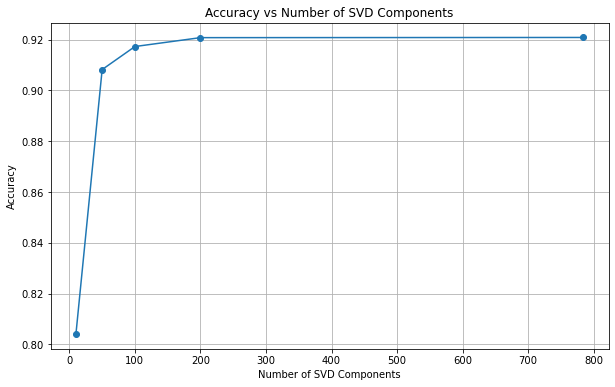

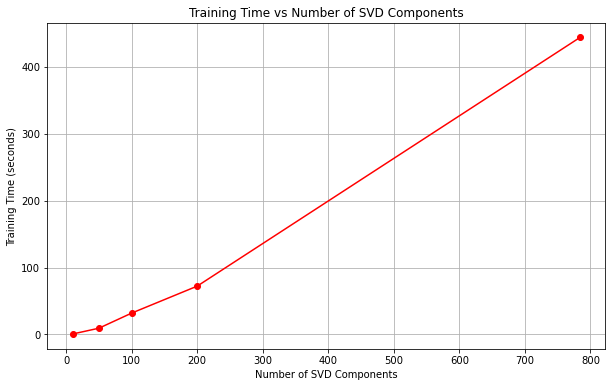

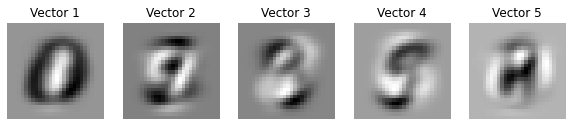

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

components, accuracies, times = zip(*results)

# Plot Accuracy vs Number of Components
plt.figure(figsize=(10, 6))
plt.plot(components, accuracies, marker='o', label='Accuracy')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of SVD Components')
plt.grid(True)
plt.show()

# Plot Training Time vs Number of Components
plt.figure(figsize=(10, 6))
plt.plot(components, times, marker='o', color='red', label='Training Time')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Number of SVD Components')
plt.grid(True)
plt.show()

def plot_singular_vectors(eig_vectors, num_vectors=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_vectors):
        plt.subplot(1, num_vectors, i+1)
        plt.imshow(eig_vectors[:, i].reshape(28, 28), cmap='gray')
        plt.title(f"Vector {i+1}")
        plt.axis('off')
    plt.show()

# Plot the top 5 singular vectors from the largest dimensionality case (784)
eig_values, eig_vectors = np.linalg.eigh(np.dot((X_train - np.mean(X_train, axis=0)).T, (X_train - np.mean(X_train, axis=0))))
sorted_indices = np.argsort(eig_values)[::-1]
eig_vectors = eig_vectors[:, sorted_indices]
plot_singular_vectors(eig_vectors, num_vectors=5)

## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

In [6]:
#The biggest thing I see in this data is the sharp decrease in accuracy when using few components. This does make sense because with fewer components, 
#too much information is discarded from the original data for the accuracy to be high. I do see that there is a significant improvementsin accuracy when the numbers of 
#components are between 50-100 where it reaches around 0.92 accuracy. This means that these numbers capture enough of the datas variance to effectively classify the mnist digits.
#After 200 components. there seems to be a plateau with the amount of accuracy, meaning that adding more components at that point does not significantly improve performance and 
#simply increases training times. 

#In terms of training times, as the number of SVD components rises, so does the training time. The training time increases almost in a linear fashion but the accuracy does not
#improve too much after 100 components, so this shows there is a clear trade off. using more components will take longer, but the accuracy gains after 100 components are minimal

#Because of these conclusions, in my opinion to optimize performance, between 50-100 components seems like the right number of components. 
#This is because it still provides  ahigh accuracy of around 0.91-0.92 with much faster training times than when using the full 200 components"